# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡—奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`tit_train.csv`和`tit_test.csv`。

`tit_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括船舱所在等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`tit_test.csv`只包含乘客（这些乘客不在`tit_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titanic_train.csv`每列的含义如下

- PassengerId：乘客ID
- survival：是否幸存
    - 0 否
    - 1 是
- pclass：船舱等级
    - 1 一等舱
    - 2 二等舱
    - 3 三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
    - C 瑟堡
    - Q 皇后镇
    - S 南安普敦

`tit_tes.csv`每列的含义与上面的相同，但不具备survival变量的数据，即是否幸存。

## 读取数据

导入数据分析所需要的库。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

我们计划先利用`tit_train.csv`训练预测模型，因此读取数据方面，当前只需要导入`tit_train.csv`。  

通过`pandas`库里的`read_csv`函数，解析原始文件`tit_train.csv`为Dataframe并赋值给`original_tit_train`变量。

In [2]:
original_tit_train = pd.read_csv('./tit_train.csv')
original_tit_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 评估和清理数据

在这一部分中，我们将对在上一部分建立的`original_tit_train`DataFrame所包含的数据进行评估和清理。主要从两个方面进行：结构和内容，即整齐度和干净度。  

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格“这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。
为了区分开经过清理的数据和原始的数据，我们创建新的变量`cleaned_tit_train`，让它为`original_tit_train`复制出的副本。我们之后的清理步骤都将被运用在`cleaned_tit_train`上。

In [3]:
cleaned_tit_train = original_tit_train.copy()

### 数据整齐度

In [4]:
cleaned_tit_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


根据数据抽样可以看出，数据满足“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，不存在结构性问题。

### 数据干净度

先大致观察一下数据的情况。

In [5]:
cleaned_tit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


从以上信息可以看出，`PassengerId`属性的数据类型需要修改，`Age`、`Cabin`和`Embarked`属性存在缺失值，后续需要进行评估。  

并且`Survived`（是否幸存）、`Pclass`（船舱等级）、`Sex`（性别）、`Embarked`（登船港口）都是分类数据，可以把数据类型改为Category。

In [6]:
cleaned_tit_train['PassengerId'] = cleaned_tit_train['PassengerId'].astype(str)

In [7]:
cleaned_tit_train[['Survived','Pclass','Sex','Embarked']] = cleaned_tit_train[['Survived','Pclass','Sex','Embarked']].astype('category')

#### 处理缺失数据

先将`Age`属性值缺失的观察值筛选出来进行观察。

In [8]:
cleaned_tit_train.query("Age.isnull()")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


可以看出有177条记录中`Age`属性缺失，约占总体数据20%左右，由于这些观察值数量较多，并且其他变量仍能提供分析价值，所以保留这些行。  

但由于后面使用的`logit`函数不允许有缺失值，所以用乘客的年龄平均值对缺失值进行填充。

In [9]:
average_age = cleaned_tit_train['Age'].mean()
cleaned_tit_train['Age'] = cleaned_tit_train['Age'].fillna(average_age)
sum(cleaned_tit_train['Age'].isnull())

0

In [10]:
cleaned_tit_train.query('Cabin.isnull()')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


一共有687条数据在`Cabin`属性中有缺失值，说明船舱号数据大部分观察值中都是未知，所以不能删除这些观察值。  

此外，我们认为船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量中，即使缺失也不会影响建立模型，因此可以保留这些观察值。

In [11]:
cleaned_tit_train.query("Embarked.isnull()")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


仅有两条观察值的登船港口变量缺失，但我们认为船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量中，即使缺失也不会影响建立模型，因此可以保留这些观察值。

#### 处理重复数据

根据数据变量的含义以及内容来看，`PassengerID`是乘客的唯一标识符，不能够重复。

In [12]:
cleaned_tit_train['PassengerId'].duplicated().sum()

np.int64(0)

从输出来看并没有重复数据。

#### 处理不一致数据

不一致数据可能存在于每个分类变量中，需要查看是否存在同一值指代现实同一目标的情况。

In [13]:
cleaned_tit_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
cleaned_tit_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [15]:
cleaned_tit_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
cleaned_tit_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

由输出可以看出并不存在不一致数据。

#### 处理错误或无效数据

In [17]:
cleaned_tit_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


根据输出可以看出并无错误和无效数据。

## 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，根据泰坦尼克号乘客的相关信息，预测沉船事件发生后的生还概率。  

数据变量包含乘客同乘伴侣/同胞数量，以及同乘父母/孩子数量，这些可以帮助计算出船上家庭成员的数量。我们对同乘家庭成员数量是否会显著影响幸存感兴趣，因此可以创建一个新的变量，记录这一数值。

In [18]:
cleaned_tit_train['FamilyNum'] = cleaned_tit_train['SibSp'] + cleaned_tit_train['Parch']
cleaned_tit_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## 探索数据

着手分析数据之前，可以借助数据可视化，探索数值变量的分布，以及与乘客是否幸存存在相关性的变量，为后续进一步的分析提供方向。

In [19]:
# 设置图表色盘
sns.set_palette("pastel")

In [20]:
# 设置图表尺寸
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

### 幸存比例

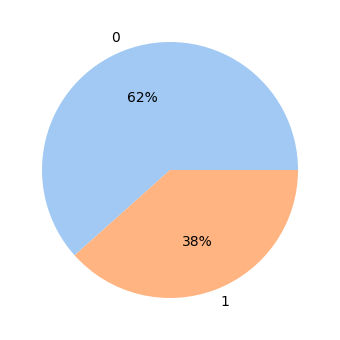

In [21]:
survived_counts = cleaned_tit_train["Survived"].value_counts()
survived_labels = survived_counts.index
plt.pie(survived_counts, labels=survived_labels, autopct="%0.0f%%")
plt.show()

### 乘客年龄

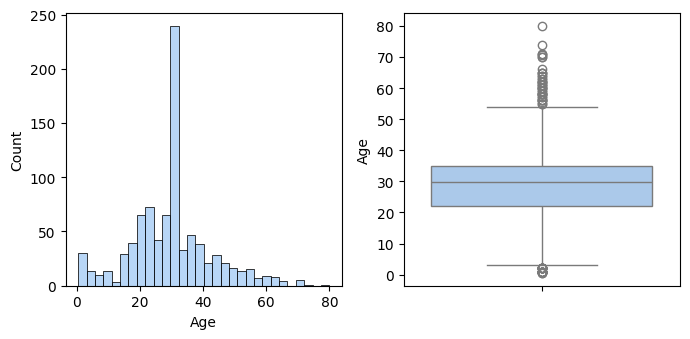

In [22]:
fig,axes = plt.subplots(1,2)
sns.histplot(cleaned_tit_train["Age"], ax=axes[0])
sns.boxplot(cleaned_tit_train["Age"], ax=axes[1])
plt.show()

大多数乘客年龄在20岁到40岁这个区间，但也有不少的乘客是老年人以及婴儿。

### 乘客年龄与是否幸存

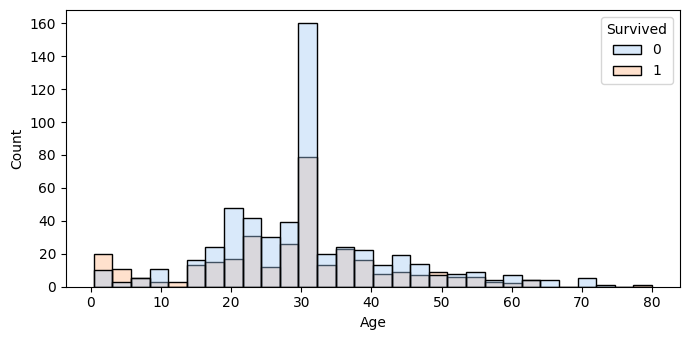

In [23]:
sns.histplot(x=cleaned_tit_train["Age"], hue=cleaned_tit_train["Survived"], alpha=0.4)
plt.show()

从图表可以看出，只有婴儿群体幸存比例较高，其余年龄段的都是遇难人数多于幸存人数。

### 船票金额分布

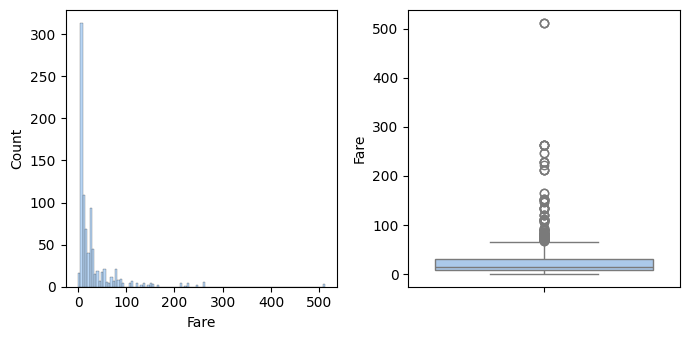

In [24]:
fig,ax = plt.subplots(1,2)
sns.histplot(cleaned_tit_train["Fare"], ax=ax[0])
sns.boxplot(cleaned_tit_train["Fare"], ax=ax[1])
plt.show()

可以看出船票金额呈右偏态分布，说明数据集中的大多数船票价格中等，但有一些票价很高的极端值拉高平均值。

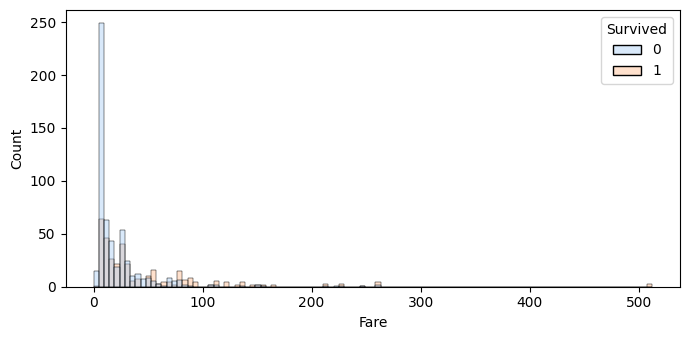

In [25]:
sns.histplot(x=cleaned_tit_train["Fare"], hue=cleaned_tit_train["Survived"], alpha=0.4)
plt.show()

### 船舱等级与是否幸存的关系

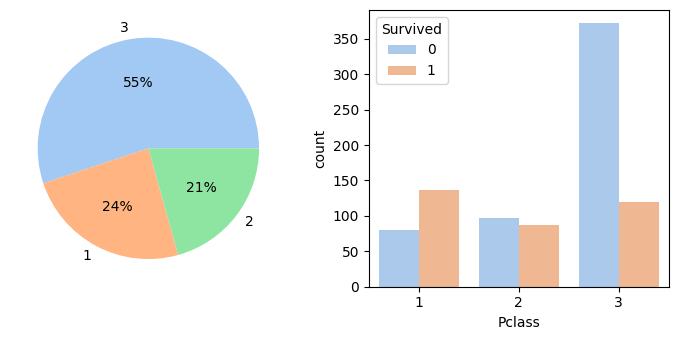

In [26]:
fig,ax = plt.subplots(1,2)
pclass_counts = cleaned_tit_train["Pclass"].value_counts()
pclass_labels = pclass_counts.index
ax[0].pie(pclass_counts, labels=pclass_labels, autopct="%0.0f%%")
sns.countplot(cleaned_tit_train, x="Pclass", hue="Survived")
plt.show()

从船舱等级的柱状图来看，一等舱的乘客幸存量大于遇难量，而二等舱跟三等舱的相反。

### 登船港口与是否幸存的关系

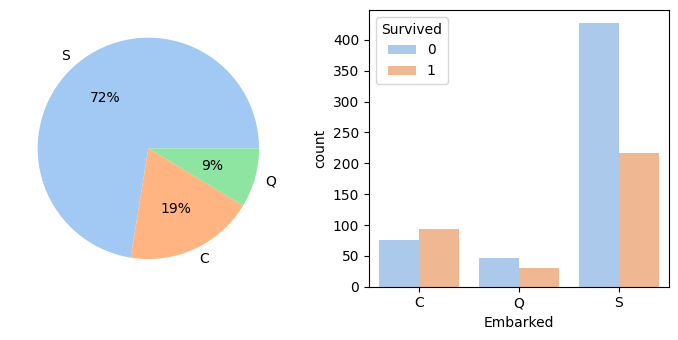

In [27]:
fig,ax = plt.subplots(1,2)
embarked_counts = cleaned_tit_train["Embarked"].value_counts()
embarked_labels = embarked_counts.index
ax[0].pie(embarked_counts, labels=embarked_labels, autopct="%0.0f%%")
sns.countplot(cleaned_tit_train, x="Embarked", hue="Survived")
plt.show()

从是否幸存与登船港口之间的柱状图来看，瑟堡登船的乘客，幸存数大于遇难数，其他两个港口相反。

### 家庭成员数量与是否幸存的关系

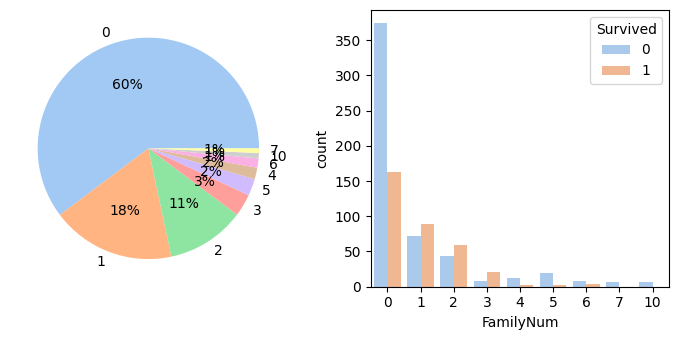

In [28]:
fig,ax = plt.subplots(1,2)
FamilyNum_counts = cleaned_tit_train["FamilyNum"].value_counts()
FamilyNum_labels = FamilyNum_counts.index
ax[0].pie(FamilyNum_counts, labels=FamilyNum_labels, autopct="%0.0f%%")
sns.countplot(cleaned_tit_train, x="FamilyNum", hue="Survived")
plt.show()

从是否幸存与乘客家庭成员之间的柱状图来看，独身一人的乘客遇难数大于幸存数，从有携带家庭成员的乘客来看，携带1～3名家庭成员的乘客幸存人数大于遇难人数，携带4～10名家庭成员的乘客遇难人数大于幸存人数。

## 分析数据

In [29]:
import statsmodels.api as sm

然后可以创建一个新的DataFrame `lr_titanic_train` 让它作为我们进行逻辑回归分析所用的数据。  

和`cleaned_titanic`区分开的原因是，我们在进行回归分析之前，还可能需要对数据进行一些准备，比如引入虚拟变量，这些都可以在`lr_titanic_train`上执行。

In [30]:
lr_titanic_train = cleaned_tit_train.copy()
lr_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


移除大概率不会影响乘客幸存概率的变量。

In [31]:
lr_titanic_train = lr_titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
lr_titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.000000,1,0,7.2500,1
1,1,1,female,38.000000,1,0,71.2833,1
2,1,3,female,26.000000,0,0,7.9250,0
3,1,1,female,35.000000,1,0,53.1000,1
4,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,0
887,1,1,female,19.000000,0,0,30.0000,0
888,0,3,female,29.699118,1,2,23.4500,3
889,1,1,male,26.000000,0,0,30.0000,0


数据里还存在分类变量，无法直接建立逻辑回归模型。我们需要引入虚拟变量，也就是0和1分别表示是否属于该类别。

In [32]:
lr_titanic_train = pd.get_dummies(lr_titanic_train, columns=['Pclass', 'Sex'], drop_first=True, dtype=int)
lr_titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,7.2500,1,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,1


In [33]:
y = lr_titanic_train['Survived']

In [34]:
X = lr_titanic_train.drop(['Survived'], axis=1)
X.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,True


In [35]:
X = X.drop(['Parch', 'SibSp'], axis=1)

接下来，给模型的线性方程添加截距。

In [36]:
X = sm.add_constant(X)

 下一步就可以调用`Logit`函数，利用最大似然优化来得到逻辑回归模型的参数值，并输出总结信息。

In [37]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Wed, 01 Jan 2025   Pseudo R-squ.:                  0.3339
Time:                        02:36:03   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

显著区间设定为0.05，以上结果的P值可以看出，模型认为船票价格对乘客幸存概率没有显著性影响。因此可以把这个变量移除后，再次建立逻辑回归模型。

In [38]:
X = X.drop(['Fare'], axis=1)
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Jan 2025   Pseudo R-squ.:                  0.3323
Time:                        02:36:03   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

逻辑回归模型预测一下因素的增加（或存在）会降低幸存概率：年龄、同乘家庭成员数、不在一等舱、性别为男性。

要理解各个自变量系数的实际含义，我们需要计算自然常数的次方。

In [39]:
# Age
np.exp(-0.0395)

np.float64(0.9612699539905982)

In [40]:
# FamilyNum
np.exp(-0.2186)

np.float64(0.803643111115195)

以上结果说明，每多一个家庭成员，生还概率就降低20%左右。

In [41]:
# Pclass_2
np.exp(-1.1798)

np.float64(0.30734020049483596)

以上结果说明，二等舱乘客的生还概率还比一等舱乘客低71%左右。

In [42]:
# Pclass_3
np.exp(-2.3458)

np.float64(0.09577055503172162)

以上结果说明，三等舱乘客的生还概率比一等舱乘客低90%左右。

In [43]:
# Sex_male
np.exp(-2.7854)

np.float64(0.061704402333015156)

以上结果说明，男性乘客的生还概率比女性乘客低94%左右。

根据模型参数值，我们总结：
- 年龄小的乘客幸存概率更高；
- 女性乘客的生还率比男性乘客的幸存概率更高；
- 来自的船舱等级高的乘客幸存概率更高；
- 同乘家庭成员少的乘客幸存概率更高。

In [44]:
titanic_test = pd.read_csv("tit_test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [46]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())
titanic_test['Age'].isna().sum()

np.int64(0)

下一步是给模型中的分类变量引入虚拟变量，但在引入之前我们需要先把分类变量的类型转化为Category，并通过`categories`参数，让程序知道所有的可能分类值。这样做的原因时，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

下一步是给模型中的分类变量引入虚拟变量，但在引入前我们需要先把分类变量的类型转换为Category，并且通过`categories`参数，让程序知道所有可能的分类值。这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [47]:
titanic_test['Pclass'] = pd.Categorical(titanic_test['Pclass'], categories=['1', '2', '3'])
titanic_test['Sex'] = pd.Categorical(titanic_test['Sex'], categories=['female', 'male'])
titanic_test['Embarked'] = pd.Categorical(titanic_test['Embarked'], categories=['C', 'Q', 'S'])

下一步，对分类变量引入虚拟变量。

In [48]:
titanic_test = pd.get_dummies(titanic_test, drop_first=True, columns=['Pclass', 'Sex'], dtype=int)
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0


In [49]:
model.params

const        4.061982
Age         -0.039495
FamilyNum   -0.218627
Pclass_2    -1.179763
Pclass_3    -2.345823
Sex_male    -2.785398
dtype: float64

In [50]:
titanic_test['FamilyNum'] = titanic_test['SibSp'] + titanic_test['Parch']
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,FamilyNum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0,2


接下来构建我们要输入给模型进行预测的变量，需要和模型训练时的输入一致。

In [51]:
X_test = titanic_test[['Age', 'FamilyNum', 'Pclass_2', 'Pclass_3', 'Sex_male']]
X_test = sm.add_constant(X_test)

现在就可以调用逻辑回归模型的`predict`，获得预测的幸存概率。

In [53]:
predicted_value = model.predict(X_test)
predicted_value

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

以上输出获得了逻辑回归模型预测的`tit_test.csv`里，泰坦尼克号乘客的幸存概率，我们可以把概率大于等于0.5的预测为幸存，小于0.5的预测为遇难，输出一下这个最终的结果。

In [54]:
predicted_value > 0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool